In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 54.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
missingno 0.5.2 requires seaborn, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
#conda remove bottleneck


In [ ]:
#conda install bottleneck

In [ ]:
!pip install --upgrade bottleneck
!pip install --upgrade pandas

In [3]:
# Define the countries and their respective coordinates (latitude, longitude)
countries = [
    {"name": "USA", "coordinates": [37.0902, -95.7129]},
    {"name": "India", "coordinates": [20.5937, 78.9629]},
    {"name": "Brazil", "coordinates": [-14.2350, -51.9253]},
    {"name": "Australia", "coordinates": [-25.2744, 133.7751]},
    {"name": "Canada", "coordinates": [56.1304, -106.3468]},
    {"name": "Russia", "coordinates": [61.5240, 105.3188]},
    {"name": "Japan", "coordinates": [36.2048, 138.2529]},
    {"name": "China", "coordinates": [35.8617, 104.1954]},
    {"name": "Germany", "coordinates": [51.1657, 10.4515]},
    {"name": "France", "coordinates": [46.6034, 1.8883]},
    {"name": "South Africa", "coordinates": [-30.5595, 22.9375]},
    {"name": "Argentina", "coordinates": [-38.4161, -63.6167]},
    {"name": "Egypt", "coordinates": [26.8206, 30.8025]},
    {"name": "Mexico", "coordinates": [23.6345, -102.5528]},
    {"name": "UK", "coordinates": [55.3781, -3.4360]},
    {"name": "Italy", "coordinates": [41.8719, 12.5674]},
    {"name": "Saudi Arabia", "coordinates": [23.8859, 45.0792]},
    {"name": "Nigeria", "coordinates": [9.0820, 8.6753]},
    {"name": "South Korea", "coordinates": [35.9078, 127.7669]},
    {"name": "Indonesia", "coordinates": [-0.7893, 113.9213]}
]

In [4]:
# Extract country names and coordinates
country_names = [country['name'] for country in countries]
coordinates = np.array([country['coordinates'] for country in countries])

In [5]:
# Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of square
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

/Users/anupamakadambi/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


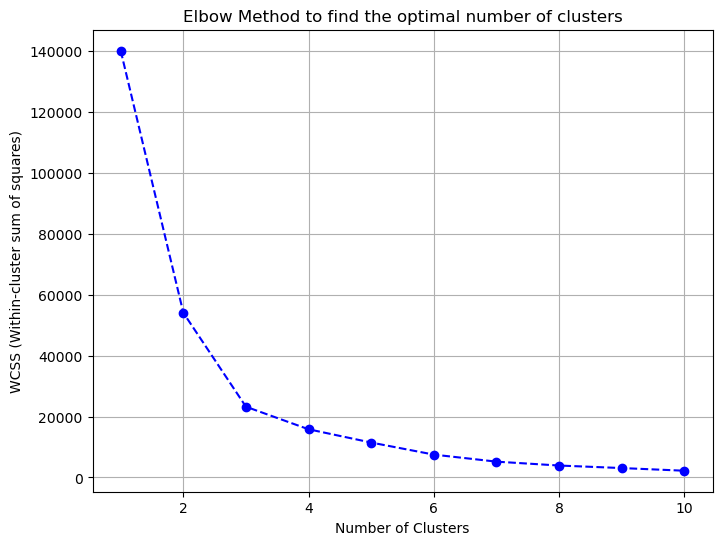

In [6]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to find the optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()


In [13]:
# Based on the elbow plot, choose optimal number of clusters (manually check for 'elbow point')
optimal_clusters = 4  # For example, choosing 3 clusters based on the plot

In [14]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(coordinates)

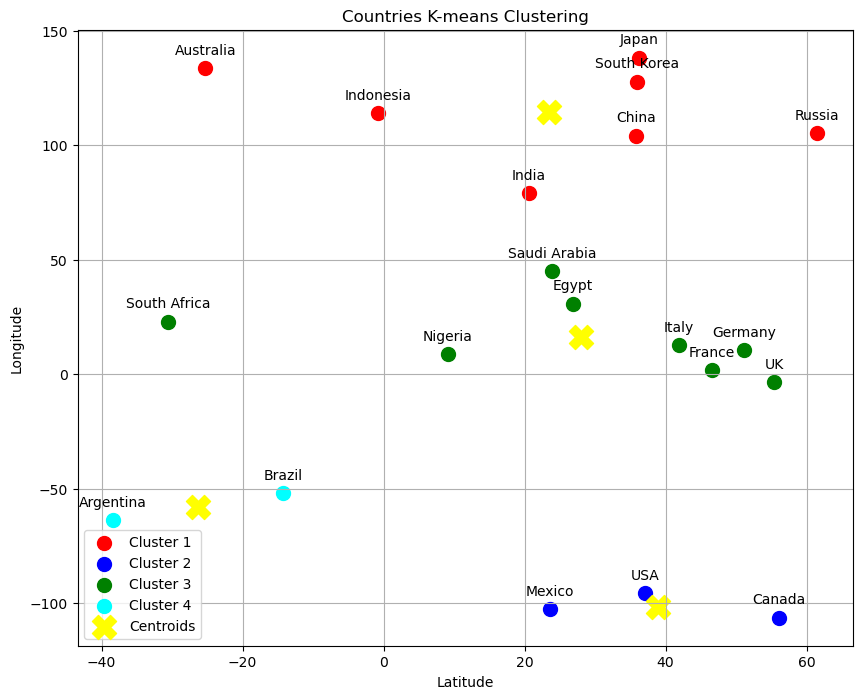

Cluster Labels:
         Country  Cluster
0            USA        1
1          India        0
2         Brazil        3
3      Australia        0
4         Canada        1
5         Russia        0
6          Japan        0
7          China        0
8        Germany        2
9         France        2
10  South Africa        2
11     Argentina        3
12         Egypt        2
13        Mexico        1
14            UK        2
15         Italy        2
16  Saudi Arabia        2
17       Nigeria        2
18   South Korea        0
19     Indonesia        0

Cluster Centroids (Latitude, Longitude):
[[  23.43261429  114.59904286]
 [  38.9517     -101.5375    ]
 [  28.0310125    16.1207125 ]
 [ -26.32555     -57.771     ]]


In [15]:
# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(coordinates[y_kmeans == i, 0], coordinates[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')
    
    # Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='X')

# Annotate country names
for i, country in enumerate(country_names):
    plt.annotate(country, (coordinates[i, 0], coordinates[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Countries K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()

# Output the centroids and labels for each country
cluster_labels = pd.DataFrame({'Country': country_names, 'Cluster': y_kmeans})
print("Cluster Labels:")
print(cluster_labels)

print("\nCluster Centroids (Latitude, Longitude):")
print(kmeans.cluster_centers_)

In [16]:
# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

In [41]:
# K-means algorithm implementation
def kmeans_iterative(data, k, max_iters=10):
    # Randomly initialize centroids from the data points
    np.random.seed(42)
    centroids = data[np.random.choice(range(data.shape[0]), k, replace=False)]
    
    for iteration in range(max_iters):
        print(f"Iteration {iteration + 1}")
        
        # Step 1: Assign each point to the nearest centroid
        labels = np.zeros(data.shape[0])  # Initialize labels array
        for i, point in enumerate(data):
            distances = euclidean_distance(point, centroids)
            labels[i] = np.argmin(distances)

        # Step 2: Recalculate the centroids
        new_centroids = np.zeros((k, data.shape[1]))
        for cluster in range(k):
            cluster_points = data[labels == cluster]
            if len(cluster_points) > 0:
                new_centroids[cluster] = np.mean(cluster_points, axis=0)

        print(f"Centroids updated:\n{new_centroids}\n")

        # Step 3: Check if centroids have changed
        if np.all(centroids == new_centroids):
            print("Converged!")
            break
        
        centroids = new_centroids
        # Plotting the clusters and centroids after each iteration
        plt.figure(figsize=(10, 6))  # Ensure this is aligned with the loop, not over-indented
        colors = ['red', 'blue', 'green', 'cyan', 'magenta']

        for cluster in range(k):
            cluster_points = coordinates[labels == cluster]  
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

        # Plot centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    s=300, c='yellow', label='Centroids', marker='X')

        # Annotate country names
        for i, country in enumerate(country_names):
            plt.annotate(country, (coordinates[i, 0], coordinates[i, 1]), 
                         textcoords="offset points", xytext=(0, 10), ha='center')

        plt.title(f'K-means Iteration {iteration + 1}')
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')
        plt.legend()
        plt.grid(True)
        plt.show()

In [51]:
from IPython.core.display import display, HTML

display(HTML("<style>.output_scroll {height: 500px; width: 100% !important;}</style>"))

/var/folders/gw/21rd1czd2lgg2h16l81yl8ym0000gn/T/ipykernel_87505/2063909994.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Iteration 1
Centroids updated:
[[ 19.60975    -92.0573    ]
 [-11.90416667  -6.77083333]
 [ 44.36794     10.45474   ]
 [ 23.489275   105.9090625 ]]



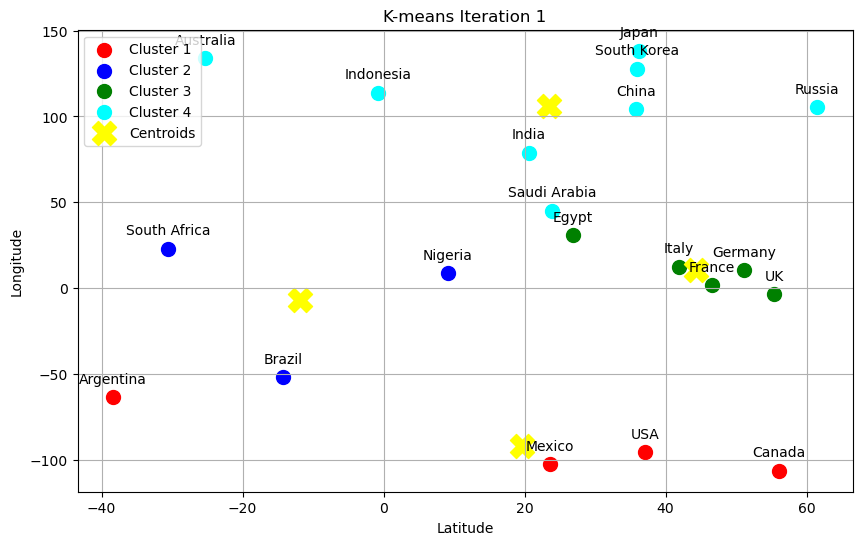

Iteration 2
Centroids updated:
[[  38.9517     -101.5375    ]
 [ -18.53215     -20.9823    ]
 [  40.95426667   16.22548333]
 [  23.43261429  114.59904286]]



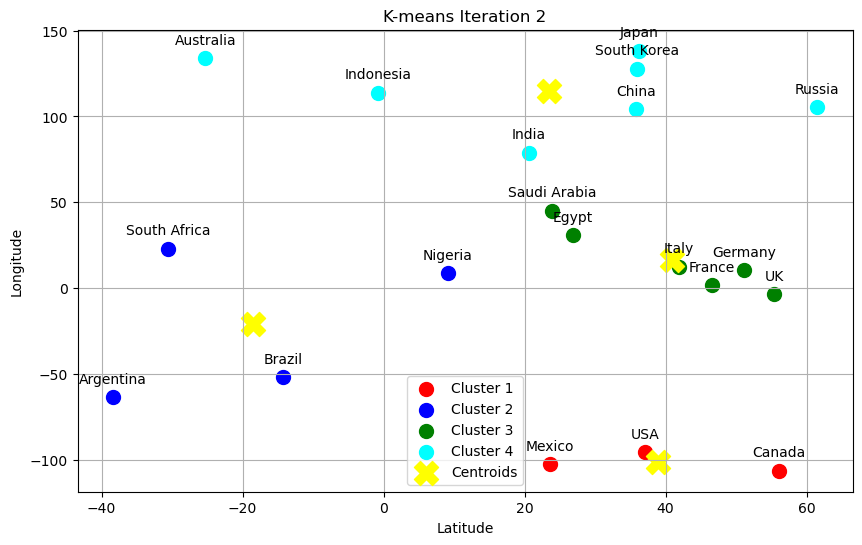

Iteration 3
Centroids updated:
[[  38.9517     -101.5375    ]
 [ -27.73686667  -30.86816667]
 [  36.40108571   15.14688571]
 [  23.43261429  114.59904286]]



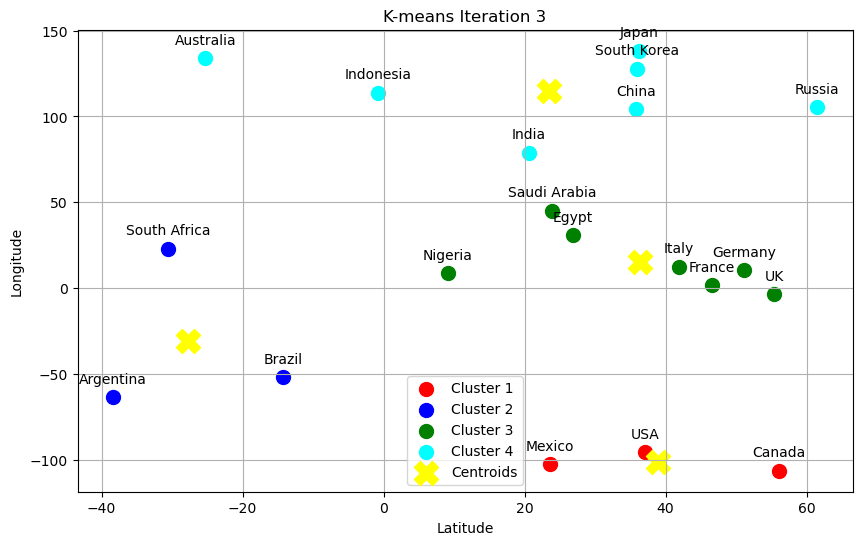

Iteration 4
Centroids updated:
[[  38.9517     -101.5375    ]
 [ -27.73686667  -30.86816667]
 [  36.40108571   15.14688571]
 [  23.43261429  114.59904286]]

Converged!


In [52]:
# Run the K-means algorithm for 3 clusters
kmeans_iterative(coordinates, k=4)